# IMPORTAR E VISUALIZAR IMAGENS

### Neste exercício utilizaremos o conjunto de dados da FEI.
- Faça o download do conjunto de dados: https://fei.edu.br/~cet/frontalimages_manuallyaligned_part1.zip
- Descompacte o conjunto e dados no mesmo diretório deste arquivo

### No primeiro exemplo vamos importar uma imagem com a biblioteca Pillow
- Utilizaremos a função **open()**, da classe **Image**, que retorna um objeto de imagem que contém os dados de pixel da imagem

##### Passo 1: Importar as bibliotecas necessárias

In [1]:
# Caso não tenha a biblioteca instalada, remova o comentário da linha abaixo na primeira vez que executar este bloco
# !pip install pillow
from PIL import Image

##### Passo 2: Importar uma imagem da conjunto de dados

In [3]:
# Carregando a imagem
file = Image.open('frontalimages_manuallyaligned_part1/1b.jpg')

##### Passo 3: Visualizar imagem

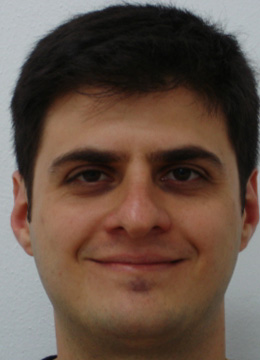

In [4]:
# Apresentando a imagem carregada na variável file
file

##### Passo 4: Visualizar as propriedades da imagem

In [5]:
# Modo da imagem
print(file.mode)

RGB


In [6]:
# Formato da imagem
print(file.format)

JPEG


In [7]:
# Tamanho da imagem (largura, altura)
print(file.size)

(260, 360)


### No segundo exemplo vamos importar uma imagem com a biblioteca Matplotlib
- utilizares a função **mpimg** do módulo **matplotlib.image** que nos permite carregar uma imagem como um **numpy.ndarray 3D**, sendo cada dimensão um canal de cor, **RED**, **GREEN**, **BLUE** e cada lista interna representa um pixel.

##### Passo 1: Importar as bibliotecas necessárias

In [8]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

##### Passo 2: Importar uma imagem da conjunto de dados

In [9]:
# Carrega a imagem como um array de pixels
data = mpimg.imread('frontalimages_manuallyaligned_part1/1b.jpg')

##### Passo 3: Visualizar array

In [10]:
# Imprime os arrays de dados
data

array([[[184, 189, 193],
        [184, 189, 193],
        [183, 188, 192],
        ...,
        [180, 185, 191],
        [178, 183, 189],
        [177, 182, 188]],

       [[184, 189, 193],
        [185, 190, 194],
        [185, 190, 194],
        ...,
        [180, 185, 191],
        [180, 185, 191],
        [180, 185, 191]],

       [[183, 188, 192],
        [185, 190, 194],
        [185, 190, 194],
        ...,
        [180, 185, 191],
        [181, 186, 192],
        [182, 187, 193]],

       ...,

       [[158, 166, 169],
        [156, 164, 167],
        [158, 166, 169],
        ...,
        [122, 126, 127],
        [122, 128, 128],
        [123, 129, 129]],

       [[157, 165, 168],
        [156, 164, 167],
        [159, 167, 170],
        ...,
        [120, 126, 126],
        [120, 126, 126],
        [119, 128, 127]],

       [[157, 165, 168],
        [158, 166, 169],
        [160, 168, 171],
        ...,
        [121, 127, 127],
        [119, 128, 127],
        [120, 129, 128]]

##### Passo 4: Visualizar as propriedades da array

In [11]:
# Imprime o tipo 
type(data)

numpy.ndarray

In [12]:
# Tipo de dados
data.dtype

dtype('uint8')

In [13]:
# Dimensão de dados
data.shape

(360, 260, 3)

##### Passo 5: Visualizar a array de pixels como uma imagem

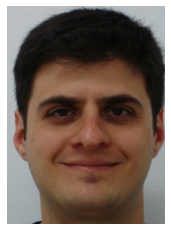

In [14]:
# Apresentando o array de pixels como uma imagem
plt.imshow(data)
plt.axis('off')
plt.show()

### No terceiro exemplo vamos utilizar as bibliotecas Pillow, Matplotlib e Numpy
Neste exemplo vamos carregar uma imagem com a função **open()** e iremos converter a imagem em tons de cinza com a função **convert('L')**, em seguida utilizaremos a função **np.array()** para carregarmos a imagem como um **numpy.ndarray**.

##### Passo 1: Importar as bibliotecas necessárias

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

##### Passo 2: Importar uma imagem da conjunto de dados

In [17]:
# Carrega a imagem
imagem = Image.open('frontalimages_manuallyaligned_part1/1a.jpg')
# Converte em tons de cinza
imagem_tons_cinza = imagem.convert("L")
# Converte em array
data = np.array(imagem_tons_cinza)

##### Passo 3: Visualizar imagem em tons de cinza e dimensão da array

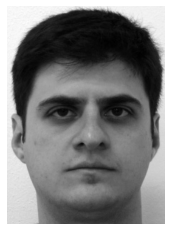

In [18]:
# Apresentando a imagem carregada na variável data
plt.imshow(data, cmap='gray')
plt.axis('off')
plt.show()

In [19]:
# Dimensão da array
data.shape

(360, 260)

### No quarto exemplo iremos carregar multiplas imagens como array
Neste exemplo, além das bibliotecas anteriores, vamos utilizar a biblioteca **glob** para listar os arquivos do diretório. 

##### Passo 1: Importar as bibliotecas necessárias

In [20]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import glob

##### Passo 2: Criar um conjunto de dados com todas as imagens do diretório

In [21]:
# Criando uma variável para armazenar as imagens
dataset = []

# Criando um laço de repetição para importar cada imagem
for file in glob.glob("frontalimages_manuallyaligned_part1/*.jpg"):
    # Carredando a imagem do índice
    load_file = Image.open(file)
    # Convertendo a imagem e tons de cinza
    load_file = load_file.convert("L")
    # Convertendo o objeto imagem em array
    load_file = np.array(load_file)
    # Adicionando a array da na variável dataset
    dataset.append(load_file)
# Convertendo a lista de imagens em array
dataset = np.array(dataset)

In [22]:
# Dimensão do conjunto de dados
dataset.shape

(200, 360, 260)

##### Passo 3: Visualizar imagens do conjunto de dados pelo índice

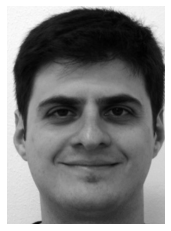

In [23]:
# Apresentando uma imagem qualquer da variável dataset
plt.imshow(dataset[23,:,:], cmap='gray')
plt.axis('off')
plt.show()

# Imagem média do conjunto de dados
- Nesta etapa iremos obter um primeiro padrão, calculando a imagem média do conjunto de dados

In [24]:
# Obtendo a dimensão das imagens
lx = dataset.shape[1]
ly = dataset.shape[2]

# Criando uma variável para armazenar as imagem média
mean_file = np.zeros([lx,ly])

# Criando um laço de repetição para calcular a média aritmética pixel a pixel de todas as imagens
for x in range(lx):
    for y in range(ly):
        mean_file[x,y] = round(np.mean(dataset[:,x,y]))

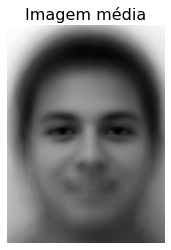

In [25]:
# Apresentando uma imagem média do conjunto de dados dataset
plt.imshow(mean_file, cmap='gray')
plt.title('Imagem média', fontsize=16)
plt.axis('off')
plt.show()

## Subconjuntos da classe de Faces
- No conjunto de dados de face da FEI há dois subconjuntos, sendo um de faces neutras e outro de faces sorrindo
- Vamos repetir o processo anterir para calcular a imagem média de cada classe

In [26]:
# Criando uma variável para armazenar as imagens neutras
dataset_neutral = []

# Criando um laço de repetição para importar cada imagem
for file in glob.glob("frontalimages_manuallyaligned_part1/*a.jpg"):
    # Carredando a imagem do índice
    load_file = Image.open(file)
    # Convertendo a imagem e tons de cinza
    load_file = load_file.convert("L")
    # Convertendo o objeto imagem em array
    load_file = np.array(load_file)
    # Adicionando a array da na variável dataset
    dataset_neutral.append(load_file)
# Convertendo a lista de imagens em array
dataset_neutral = np.array(dataset_neutral)

In [27]:
# Dimensão do conjunto de dados
dataset_neutral.shape

(100, 360, 260)

In [28]:
# Obtendo a dimensão das imagens
lx = dataset_neutral.shape[1]
ly = dataset_neutral.shape[2]

# Criando uma variável para armazenar as imagem média
mean_file_neutral = np.zeros([lx,ly])

# Criando um laço de repetição para calcular a média aritmética pixel a pixel de todas as imagens
for x in range(lx):
    for y in range(ly):
        mean_file_neutral[x,y] = round(np.mean(dataset_neutral[:,x,y]))

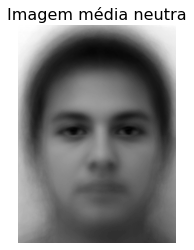

In [29]:
# Apresentando uma imagem média do conjunto de dados
plt.imshow(mean_file_neutral, cmap='gray')
plt.title('Imagem média neutra', fontsize=16)
plt.axis('off')
plt.show()

In [30]:
# Criando uma variável para armazenar as imagens sorrindo
dataset_smiling = []

# Criando um laço de repetição para importar cada imagem
for file in glob.glob("frontalimages_manuallyaligned_part1/*b.jpg"):
    # Carredando a imagem do índice
    load_file = Image.open(file)
    # Convertendo a imagem e tons de cinza
    load_file = load_file.convert("L")
    # Convertendo o objeto imagem em array
    load_file = np.array(load_file)
    # Adicionando a array da na variável dataset
    dataset_smiling.append(load_file)
# Convertendo a lista de imagens em array
dataset_smiling = np.array(dataset_smiling)

In [31]:
# Dimensão do conjunto de dados
dataset_smiling.shape

(100, 360, 260)

In [32]:
# Obtendo a dimensão das imagens
lx = dataset_smiling.shape[1]
ly = dataset_smiling.shape[2]

# Criando uma variável para armazenar as imagem média
mean_file_smiling = np.zeros([lx,ly])

# Criando um laço de repetição para calcular a média aritmética pixel a pixel de todas as imagens
for x in range(lx):
    for y in range(ly):
        mean_file_smiling[x,y] = round(np.mean(dataset_smiling[:,x,y]))

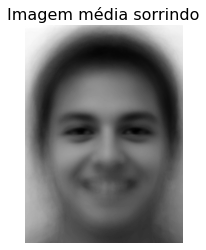

In [33]:
# Apresentando uma imagem média do conjunto de dados
plt.imshow(mean_file_smiling, cmap='gray')
plt.title('Imagem média sorrindo', fontsize=16)
plt.axis('off')
plt.show()

##### Visualização das imagens médias por categoria

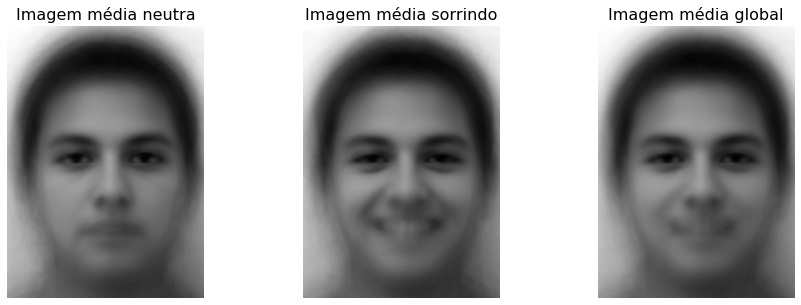

In [34]:
# Apresentando um comparativo das imagens geradas

# Configurando o tamanho da área de visualização
plt.subplots(figsize=(15, 5))

# Configurando a visualização da imagem média neutra 
plt.subplot(1,3,1)
plt.imshow(mean_file_neutral, cmap='gray')
plt.title('Imagem média neutra', fontsize=16)
plt.axis('off')

# Configurando a visualização da imagem média sorrindo 
plt.subplot(1,3,2)
plt.imshow(mean_file_smiling, cmap='gray')
plt.title('Imagem média sorrindo', fontsize=16)
plt.axis('off')

# Configurando a visualização da imagem média global
plt.subplot(1,3,3)
plt.imshow(mean_file, cmap='gray')
plt.title('Imagem média global', fontsize=16)
plt.axis('off')

# Apresentando a comparação de todas as imagens
plt.show()

## Distância Euclidiana da Média
- Nesta etapa iremos calcular a distância Euclidiana entre cada imagem do conjunto de dados com relação a imagem média.

In [35]:
# Calculando a diferença de uma imagem qualquer em relação a imagem média
diferenca = dataset[0,:,:]-mean_file

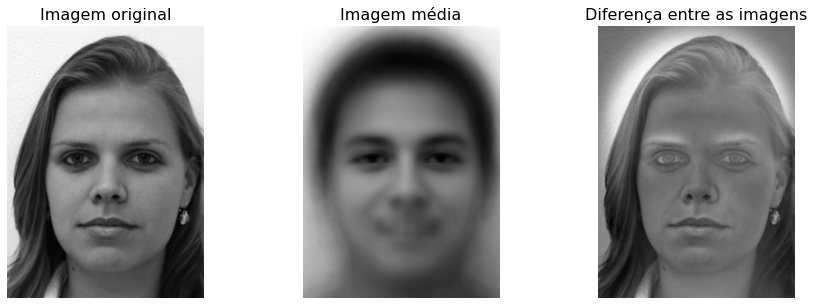

In [36]:
# Apresentando o resultado da diferença das imagens

# Configurando o tamanho da área de visualização
plt.subplots(figsize=(15, 5))

# Configurando a visualização da imagem original
plt.subplot(1,3,1)
plt.imshow(dataset[0,:,:], cmap='gray')
plt.title('Imagem original', fontsize=16)
plt.axis('off')

# Configurando a visualização da imagem média
plt.subplot(1,3,2)
plt.imshow(mean_file, cmap='gray')
plt.title('Imagem média', fontsize=16)
plt.axis('off')

# Configurando a visualização da diferença
plt.subplot(1,3,3)
plt.imshow(diferenca, cmap='gray')
plt.title('Diferença entre as imagens', fontsize=16)
plt.axis('off')

# Apresentando o resultado
plt.show()

In [37]:
# Valores da difença entre as imagens
diferenca

array([[ -2.,  -4.,  -3., ...,  -4.,  -4.,  -2.],
       [ -2.,  -1.,   0., ...,  -1.,  -1.,   0.],
       [ -4.,   0.,   1., ...,  -1.,  -2.,  -1.],
       ...,
       [-71., -58., -53., ..., -66., -65., -64.],
       [-66., -55., -56., ..., -65., -64., -64.],
       [-60., -57., -64., ..., -62., -62., -63.]])

Observem que alguns pixels vão receber valores negativos, pois o valor do pixel local da imagem média pode ser maior que o valor do pixel da imagem original.

Vejamos essa diferença pelo histograma das imagens

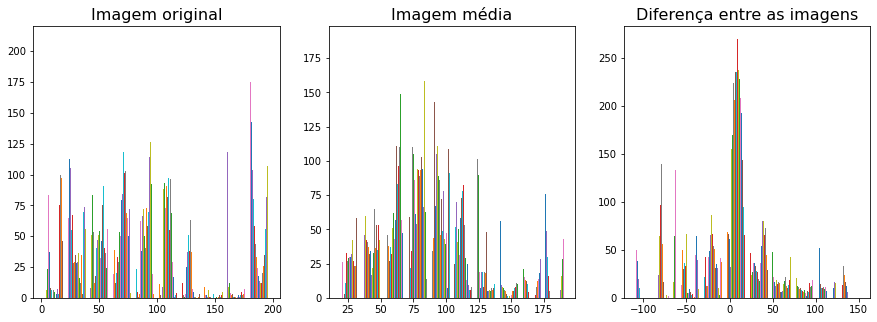

In [38]:
# Apresentando o resultado da diferença das imagens

# Configurando o tamanho da área de visualização
plt.subplots(figsize=(15, 5))

# Configurando a visualização da imagem original
plt.subplot(1,3,1)
plt.hist(dataset[0,:,:])
plt.title('Imagem original', fontsize=16)

# Configurando a visualização da imagem média
plt.subplot(1,3,2)
plt.hist(mean_file)
plt.title('Imagem média', fontsize=16)

# Configurando a visualização da diferença
plt.subplot(1,3,3)
plt.hist(diferenca)
plt.title('Diferença entre as imagens', fontsize=16)

# Apresentando o resultado
plt.show()

### Difença absoluta

A diferença absoluta de cada imagem pode ser obtida pela somatória do módulo da diferença entre a cada imagem e a imagem média, conforme equação a seguir, em que **I** repesenta uma imagem da lista e **M** a imagem média.
$$∑|I_{ji}-M_{ji}|$$


In [39]:
# Exemplo de implementação desta equação para uma imagem qualquer da lista
np.sum(abs(dataset[2,:,:]-mean_file))

2475473.0

### Obtendo a diferença absoluta de todas as imagens

In [40]:
# Obtendo a dimensão do conjunto de imagens neutras
indice = dataset_neutral.shape[0]

# Criando variáveis para armazenar a diferença das imagens
dif_neutral_mean_file = np.zeros([indice])
dif_neutral_mean_neutral = np.zeros([indice])
dif_neutral_mean_smiling = np.zeros([indice])

# Criando um laço de repetição para calcular a diferença entre as imagens
for img in range(indice):
    dif_neutral_mean_file[img] = np.sum(abs(dataset_neutral[img,:,:]-mean_file))
    dif_neutral_mean_neutral[img] = np.sum(abs(dataset_neutral[img,:,:]-mean_file_neutral))
    dif_neutral_mean_smiling[img] = np.sum(abs(dataset_neutral[img,:,:]-mean_file_smiling))

In [41]:
# Empilhamento das arrays de diferença
dif_neutral = np.stack((dif_neutral_mean_file, dif_neutral_mean_neutral,dif_neutral_mean_smiling), axis=1)
dif_neutral

array([[2943841., 2964851., 2964449.],
       [2475473., 2462849., 2551127.],
       [3373776., 3328382., 3428954.],
       [2258846., 2287434., 2237938.],
       [2925115., 2887657., 2982289.],
       [2454897., 2446857., 2498661.],
       [2756211., 2749261., 2774953.],
       [3541595., 3596115., 3490745.],
       [2405091., 2362695., 2481527.],
       [2361438., 2369804., 2411448.],
       [2605467., 2613037., 2649351.],
       [2310059., 2258473., 2380065.],
       [2003572., 2016978., 2048734.],
       [2702799., 2690811., 2744301.],
       [2201709., 2230061., 2229247.],
       [1979130., 2017304., 1992012.],
       [2374187., 2372433., 2409689.],
       [2209117., 2252979., 2202227.],
       [2457038., 2481206., 2498356.],
       [2547445., 2464615., 2638589.],
       [3725334., 3701202., 3755664.],
       [2782046., 2735178., 2837834.],
       [2931110., 2867334., 3007448.],
       [2637479., 2658717., 2648023.],
       [2640590., 2585362., 2714538.],
       [2565946., 2520490

### Repetindo o processo para as imagens da classe sorrindo

In [42]:
# Obtendo a dimensão do conjunto de imagens sorrindo
indice = dataset_smiling.shape[0]

# Criando variáveis para armazenar a diferença das imagens
dif_smiling_mean_file = np.zeros([indice])
dif_smiling_mean_neutral = np.zeros([indice])
dif_smiling_mean_smiling = np.zeros([indice])

# Criando um laço de repetição para calcular a diferença entre as imagens
for img in range(indice):
    dif_smiling_mean_file[img] = np.sum(abs(dataset_smiling[img,:,:]-mean_file))
    dif_smiling_mean_neutral[img] = np.sum(abs(dataset_smiling[img,:,:]-mean_file_neutral))
    dif_smiling_mean_smiling[img] = np.sum(abs(dataset_smiling[img,:,:]-mean_file_smiling))

In [43]:
# Empilhamento das arrays de diferença
dif_smiling = np.stack((dif_smiling_mean_file, dif_smiling_mean_neutral,dif_smiling_mean_smiling), axis=1)
dif_smiling

array([[3173310., 3275342., 3090230.],
       [2400789., 2435699., 2383279.],
       [3268546., 3253630., 3313932.],
       [2215522., 2245048., 2192388.],
       [2941112., 2982178., 2927484.],
       [2361758., 2367874., 2390264.],
       [2937822., 3004434., 2901422.],
       [3543559., 3605207., 3484761.],
       [2245805., 2290055., 2240627.],
       [2348994., 2376610., 2345134.],
       [2657467., 2676685., 2688935.],
       [2316674., 2366802., 2301608.],
       [2088258., 2133474., 2056334.],
       [2614660., 2663972., 2608332.],
       [2454240., 2542858., 2375970.],
       [2072153., 2120689., 2036781.],
       [2278021., 2341305., 2253935.],
       [2392717., 2463101., 2340227.],
       [2321064., 2359708., 2308326.],
       [2563356., 2522554., 2638658.],
       [3707833., 3748807., 3698935.],
       [2688327., 2720665., 2694085.],
       [2708367., 2684027., 2759261.],
       [2661349., 2696135., 2663413.],
       [2459844., 2490124., 2469162.],
       [2574847., 2618721

### Visualização das diferenças

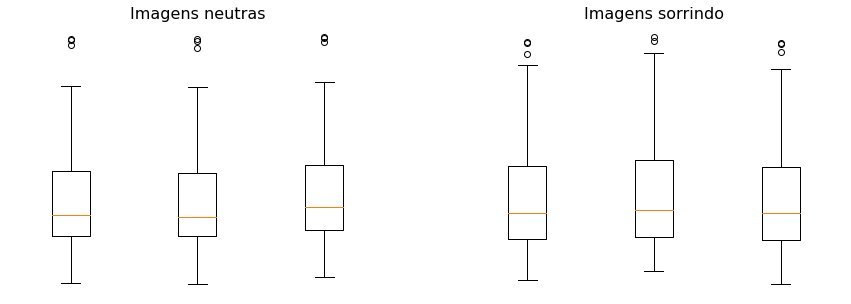

In [44]:
# Apresentando o resultado da diferença das imagens
import matplotlib.pyplot as plt
# Configurando o tamanho da área de visualização
plt.subplots(figsize=(15, 5))

# Configurando a visualização das imagens neutras
plt.subplot(1,2,1)
plt.boxplot(dif_neutral, vert = 1)
plt.title('Imagens neutras', fontsize=16)
plt.axis('off')

# Configurando a visualização das imagens sorrindo
plt.subplot(1,2,2)
plt.boxplot(dif_smiling, vert = 1)
plt.title('Imagens sorrindo', fontsize=16)
plt.axis('off')

# Visualização dos resultados
plt.show()

### Visualizando os dados com SEABORN

##### Passo 1: Importar as bibliotecas necessárias

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Passo 2: Configuração dos dados de visualização

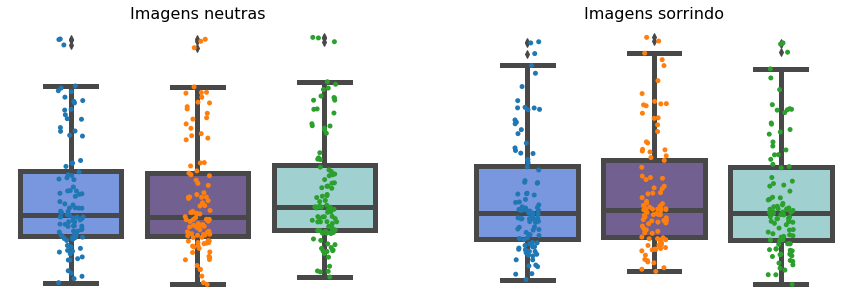

In [47]:
# Apresentando o resultado da diferença das imagens

# Configurando o tamanho da área de visualização
plt.subplots(figsize=(15, 5))

# Configurando a paleta de cores dos boxplot
colors = ['#6890F0', '#705898', '#98D8D8']

# Configurando a visualização das imagens neutras
plt.subplot(1,2,1)
plt.title('Imagens neutras', fontsize=16)
plt.axis('off')
# plot das diferenças em relação a médias das classes
sns.boxplot(data = dif_neutral, linewidth=5, palette=colors)
# Gráfico de disperção
sns.stripplot(data = dif_neutral) 

# Configurando a visualização das imagens sorrindo
plt.subplot(1,2,2)
plt.title('Imagens sorrindo', fontsize=16)
plt.axis('off')
# plot das diferenças em relação a médias das classes
sns.boxplot(data = dif_smiling, linewidth=5, palette=colors)
# Gráfico de disperção
sns.stripplot(data = dif_smiling) 

# Visualização dos resultados
plt.show()

# EXERCÍCIO

Nós vimos nos passos anteriores como calcular a média das imagens e a respectiva distância entre cada imagem.
- Considere repitir esses passos para calcular a diferença entre as imagens a partir de outros padrões como a **mediana** e a **moda**, ao final, compare os resultados.

## Mediana

In [48]:
# Obtendo a dimensão das imagens
lx = dataset.shape[1]
ly = dataset.shape[2]

# Criando uma variável para armazenar as imagem média
median_file = np.zeros([lx,ly])

# Criando um laço de repetição para calcular a média aritmética pixel a pixel de todas as imagens
for x in range(lx):
    for y in range(ly):
        median_file[x,y] = round(np.median(dataset[:,x,y]))

In [49]:
# Obtendo a dimensão das imagens
lx = dataset_neutral.shape[1]
ly = dataset_neutral.shape[2]

# Criando uma variável para armazenar as imagem média
median_file_neutral = np.zeros([lx,ly])

# Criando um laço de repetição para calcular a média aritmética pixel a pixel de todas as imagens
for x in range(lx):
    for y in range(ly):
        median_file_neutral[x,y] = round(np.median(dataset_neutral[:,x,y]))

In [50]:
# Obtendo a dimensão das imagens
lx = dataset_smiling.shape[1]
ly = dataset_smiling.shape[2]

# Criando uma variável para armazenar as imagem média
median_file_smiling = np.zeros([lx,ly])

# Criando um laço de repetição para calcular a média aritmética pixel a pixel de todas as imagens
for x in range(lx):
    for y in range(ly):
        median_file_smiling[x,y] = round(np.median(dataset_smiling[:,x,y]))

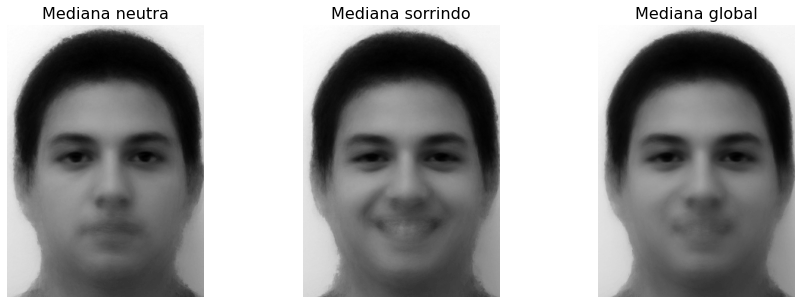

In [51]:
# Apresentando um comparativo das imagens geradas

# Configurando o tamanho da área de visualização
plt.subplots(figsize=(15, 5))

# Configurando a visualização da imagem média neutra 
plt.subplot(1,3,1)
plt.imshow(median_file_neutral, cmap='gray')
plt.title('Mediana neutra', fontsize=16)
plt.axis('off')

# Configurando a visualização da imagem média sorrindo 
plt.subplot(1,3,2)
plt.imshow(median_file_smiling, cmap='gray')
plt.title('Mediana sorrindo', fontsize=16)
plt.axis('off')

# Configurando a visualização da imagem média global
plt.subplot(1,3,3)
plt.imshow(median_file, cmap='gray')
plt.title('Mediana global', fontsize=16)
plt.axis('off')

# Apresentando a comparação de todas as imagens
plt.show()

## Moda

##### Exemplo passo a passo de como obter a moda

In [52]:
# Importando a biblioteca Stats
from scipy import stats

# Criando lista de exemplo
a = np.array([3, 3, 2, 2, 1, 1, 1])

# Obtendo a moda
stats.mode(a)

ModeResult(mode=array([1]), count=array([3]))

### Obtendo a moda do conjunto de dados

In [53]:
# Obtendo a dimensão das imagens
lx = dataset.shape[1]
ly = dataset.shape[2]

# Criando uma variável para armazenar as imagem média
mode_file = np.zeros([lx,ly])

# Criando um laço de repetição para calcular a média aritmética pixel a pixel de todas as imagens
for x in range(lx):
    for y in range(ly):
        mode_file[x,y] = stats.mode(dataset[:,x,y])[0]

In [54]:
# Obtendo a dimensão das imagens
lx = dataset_neutral.shape[1]
ly = dataset_neutral.shape[2]

# Criando uma variável para armazenar as imagem média
mode_file_neutral = np.zeros([lx,ly])

# Criando um laço de repetição para calcular a média aritmética pixel a pixel de todas as imagens
for x in range(lx):
    for y in range(ly):
        mode_file_neutral[x,y] = stats.mode(dataset_neutral[:,x,y])[0]

In [55]:
# Obtendo a dimensão das imagens
lx = dataset_smiling.shape[1]
ly = dataset_smiling.shape[2]

# Criando uma variável para armazenar as imagem média
mode_file_smiling = np.zeros([lx,ly])

# Criando um laço de repetição para calcular a média aritmética pixel a pixel de todas as imagens
for x in range(lx):
    for y in range(ly):
        mode_file_smiling[x,y] = stats.mode(dataset_smiling[:,x,y])[0]

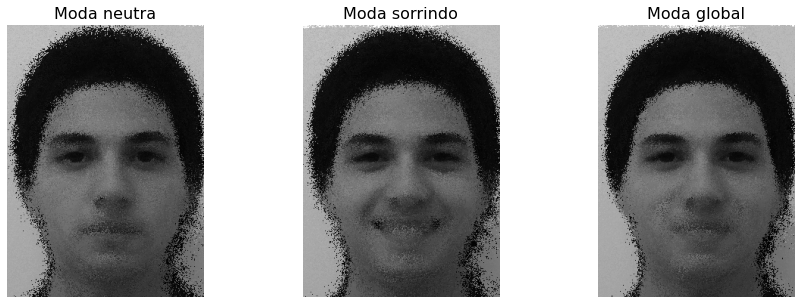

In [56]:
# Apresentando um comparativo das imagens geradas

# Configurando o tamanho da área de visualização
plt.subplots(figsize=(15, 5))

# Configurando a visualização da imagem média neutra 
plt.subplot(1,3,1)
plt.imshow(mode_file_neutral, cmap='gray')
plt.title('Moda neutra', fontsize=16)
plt.axis('off')

# Configurando a visualização da imagem média sorrindo 
plt.subplot(1,3,2)
plt.imshow(mode_file_smiling, cmap='gray')
plt.title('Moda sorrindo', fontsize=16)
plt.axis('off')

# Configurando a visualização da imagem média global
plt.subplot(1,3,3)
plt.imshow(mode_file, cmap='gray')
plt.title('Moda global', fontsize=16)
plt.axis('off')

# Apresentando a comparação de todas as imagens
plt.show()

# Comparação de todos os padrões

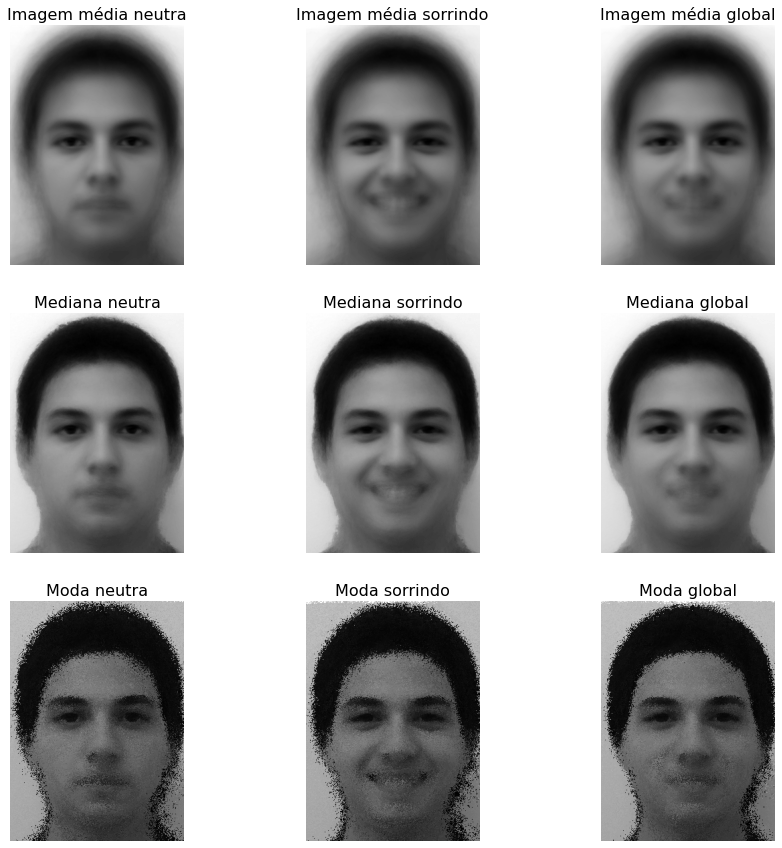

In [57]:
# Configurando o tamanho da área de visualização
plt.subplots(figsize=(15, 15))

# -------------------MÉDIA--------------------------
# Configurando a visualização da imagem média neutra 
plt.subplot(3,3,1)
plt.imshow(mean_file_neutral, cmap='gray')
plt.title('Imagem média neutra', fontsize=16)
plt.axis('off')

# Configurando a visualização da imagem média sorrindo 
plt.subplot(3,3,2)
plt.imshow(mean_file_smiling, cmap='gray')
plt.title('Imagem média sorrindo', fontsize=16)
plt.axis('off')

# Configurando a visualização da imagem média global
plt.subplot(3,3,3)
plt.imshow(mean_file, cmap='gray')
plt.title('Imagem média global', fontsize=16)
plt.axis('off')

# -------------------MEDIANA------------------------
# Configurando a visualização da imagem média neutra 
plt.subplot(3,3,4)
plt.imshow(median_file_neutral, cmap='gray')
plt.title('Mediana neutra', fontsize=16)
plt.axis('off')

# Configurando a visualização da imagem média sorrindo 
plt.subplot(3,3,5)
plt.imshow(median_file_smiling, cmap='gray')
plt.title('Mediana sorrindo', fontsize=16)
plt.axis('off')

# Configurando a visualização da imagem média global
plt.subplot(3,3,6)
plt.imshow(median_file, cmap='gray')
plt.title('Mediana global', fontsize=16)
plt.axis('off')

# -------------------MODA---------------------------
# Configurando a visualização da imagem média neutra 
plt.subplot(3,3,7)
plt.imshow(mode_file_neutral, cmap='gray')
plt.title('Moda neutra', fontsize=16)
plt.axis('off')

# Configurando a visualização da imagem média sorrindo 
plt.subplot(3,3,8)
plt.imshow(mode_file_smiling, cmap='gray')
plt.title('Moda sorrindo', fontsize=16)
plt.axis('off')

# Configurando a visualização da imagem média global
plt.subplot(3,3,9)
plt.imshow(mode_file, cmap='gray')
plt.title('Moda global', fontsize=16)
plt.axis('off')

# Apresentando a comparação de todas as imagens
plt.show()

### Chegamos ao fim!
Hora de guardar o arquivo!

# Boas práticas

Considere criar um portifólio com todos os projetos e blocos de códigos desenvolvidos nesta disciplina.

Isso pode ser feito em um repositório gratuíto, como o www.github.com

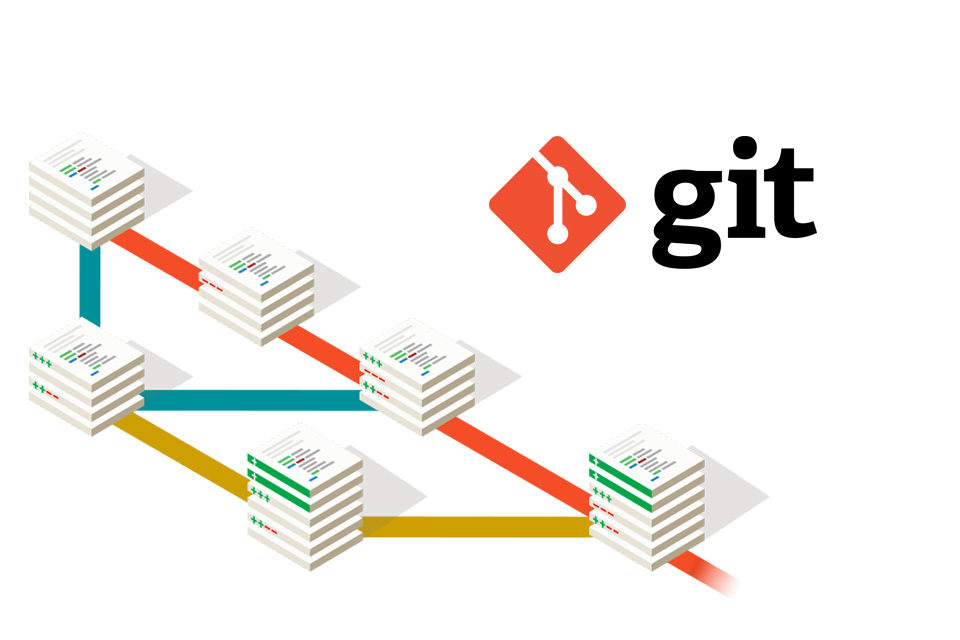